# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [2]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-16 00:26:42--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-16 00:26:43--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.1’

c

In [3]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [4]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [5]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
Genero, Edad, Categoria, Metodo de Pago, Centro Comercial

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas antes de la eliminación:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nNúmero de filas duplicadas después de la eliminación:")
print(df.duplicated().sum())

Valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Número de filas duplicadas antes de la eliminación:
0

Número de filas duplicadas después de la eliminación:
0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [9]:
df['total_value'] = df['quantity'] * df['price']
print("DataFrame con la nueva columna 'total_value':")
display(df.head())

DataFrame con la nueva columna 'total_value':


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


***Otra variable que podria ser util es el valor gastado dependiendo del género, para saber si gastan más hombres o mujeres***

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

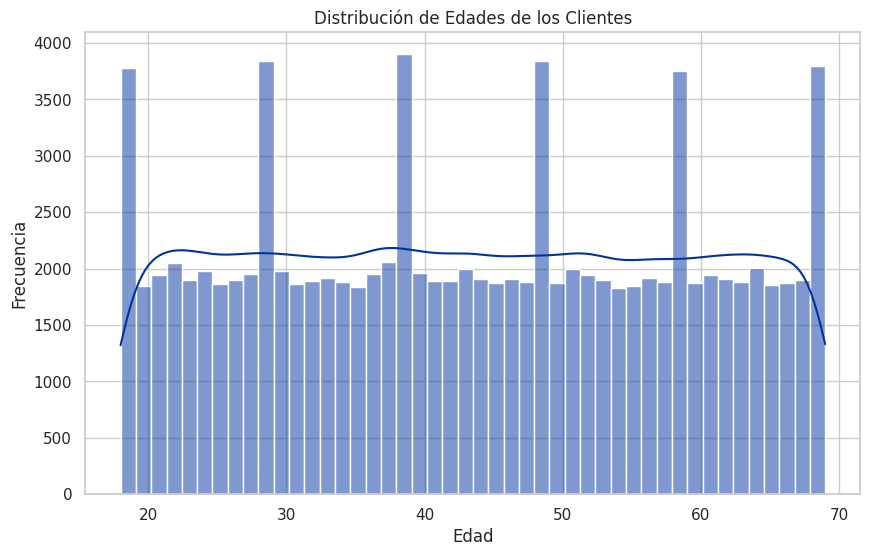

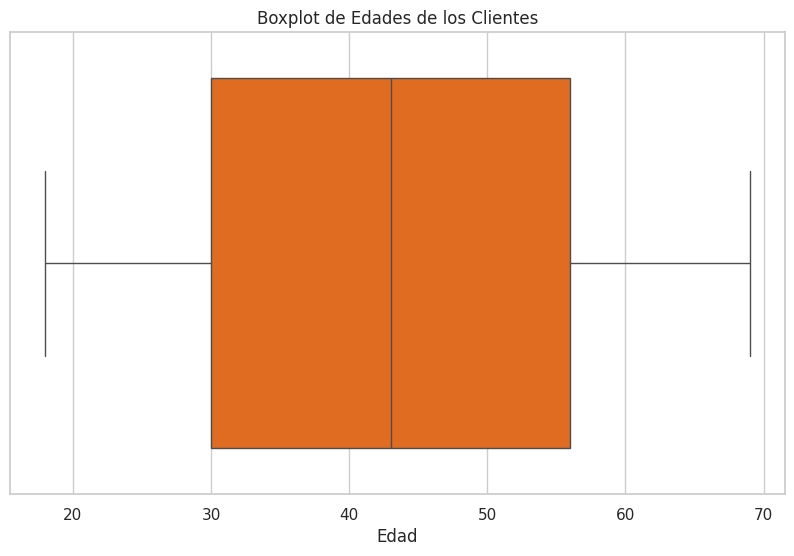

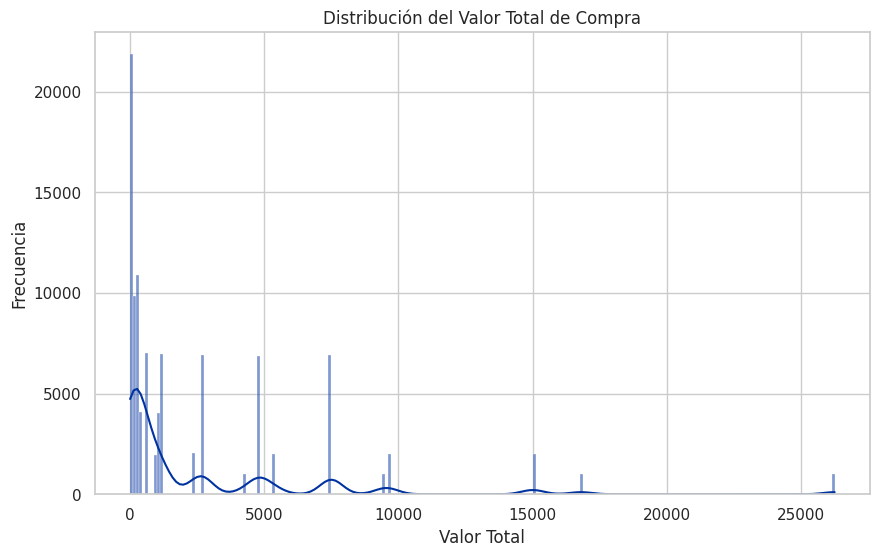

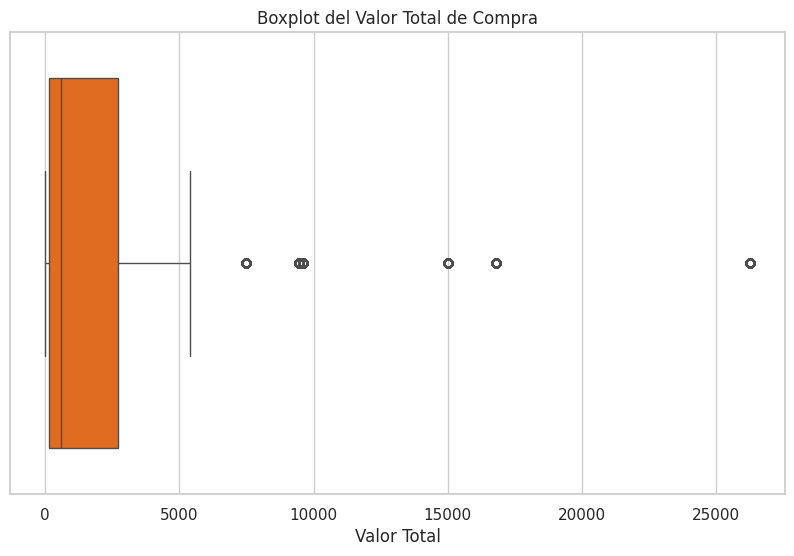

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color=corporate_colors[0])
plt.title('Distribución de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'], color=corporate_colors[1])
plt.title('Boxplot de Edades de los Clientes')
plt.xlabel('Edad')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['total_value'], kde=True, color=corporate_colors[0])
plt.title('Distribución del Valor Total de Compra')
plt.xlabel('Valor Total')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_value'], color=corporate_colors[1])
plt.title('Boxplot del Valor Total de Compra')
plt.xlabel('Valor Total')
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [14]:
age_bins = [0, 25, 50, 100]
age_labels = ['Jóvenes', 'Adultos', 'Mayores']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print("Distribución de clientes por grupo de edad:")
display(df['age_group'].value_counts())

print("\nDistribución de clientes por género:")
display(df['gender'].value_counts())

print("\nDistribución de género por grupo de edad:")
display(df.groupby('age_group', observed=False)['gender'].value_counts().unstack())

Distribución de clientes por grupo de edad:


,count
age_group,
Adultos,47987
Mayores,37974
Jóvenes,13496



Distribución de clientes por género:


,count
gender,
Female,59482
Male,39975



Distribución de género por grupo de edad:


gender,Female,Male
age_group,,
Jóvenes,7938,5558
Adultos,28829,19158
Mayores,22715,15259


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [15]:
print("Distribución de clientes por categoría de producto:")
display(df['category'].value_counts())

print("\nDistribución de clientes por método de pago:")
display(df['payment_method'].value_counts())

print("\nDistribución de clientes por centro comercial:")
display(df['shopping_mall'].value_counts())

Distribución de clientes por categoría de producto:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Distribución de clientes por método de pago:


,count
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079



Distribución de clientes por centro comercial:


,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


***Creo que la categoría de mayor impacto sería la categoría de la compra porque a partir de ello se puede saber en que categoría se puede desarrollar una estratégia para mejorar las ventas.***

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Distribución de categorías de producto por grupo de edad:


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_group,,,,,,,,
Jóvenes,687,4686,1979,2051,1367,672,648,1406
Adultos,2355,16667,7289,7103,4819,2417,2480,4857
Mayores,1939,13134,5829,5622,3848,1910,1868,3824


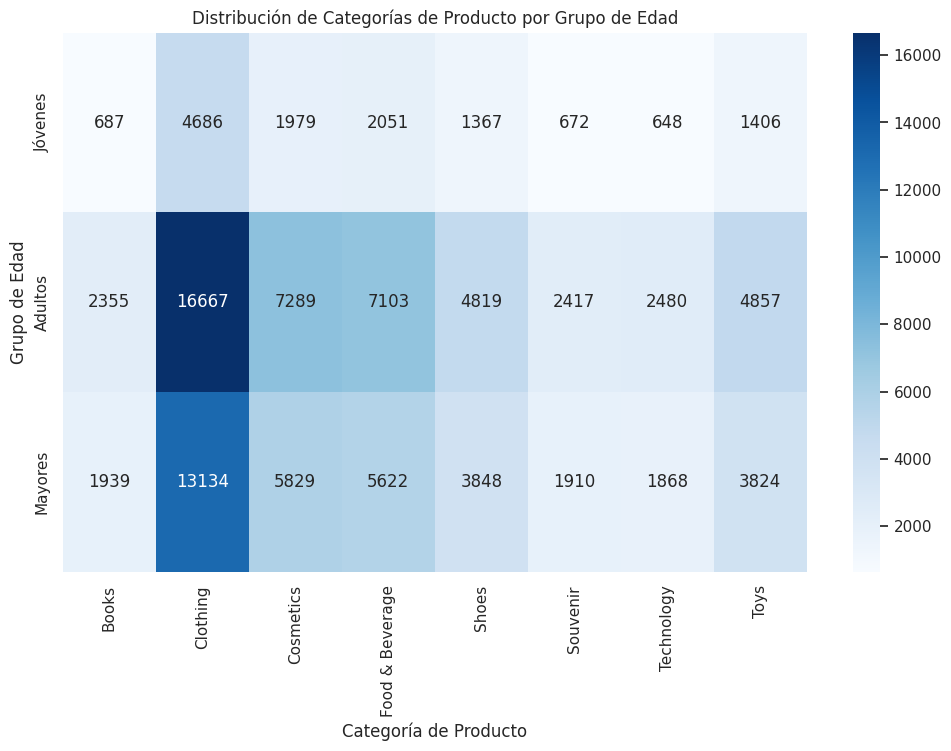

In [16]:
print("Distribución de categorías de producto por grupo de edad:")
cross_tab_age_category = pd.crosstab(df['age_group'], df['category'])
display(cross_tab_age_category)

plt.figure(figsize=(12, 7))
sns.heatmap(cross_tab_age_category, annot=True, fmt='d', cmap='Blues')
plt.title('Distribución de Categorías de Producto por Grupo de Edad')
plt.xlabel('Categoría de Producto')
plt.ylabel('Grupo de Edad')
plt.show()

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [19]:
print("Distribución actual de categorías:")
display(df['category'].value_counts())

low_frequency_categories = df['category'].value_counts()[df['category'].value_counts() < low_frequency_threshold].index.tolist()

df['category_grouped'] = df['category'].apply(lambda x: 'Otros' if x in low_frequency_categories else x)

print("\nDistribución de categorías después de agrupar:")
display(df['category_grouped'].value_counts())

Distribución actual de categorías:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Distribución de categorías después de agrupar:


,count
category_grouped,
Clothing,34487
Cosmetics,15097
Otros,14976
Food & Beverage,14776
Toys,10087
Shoes,10034


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [21]:
df['combined_segment'] = df['age_group'].astype(str) + '_' + df['category_grouped'].astype(str) + '_' + df['shopping_mall'].astype(str)

print("Primeros registros con la nueva columna de segmento combinado:")
display(df[['customer_id', 'age_group', 'category_grouped', 'shopping_mall', 'combined_segment']].head())

print("\nDistribución de los segmentos combinados (primeros 20):")
display(df['combined_segment'].value_counts().head(20))

Primeros registros con la nueva columna de segmento combinado:


,customer_id,age_group,category_grouped,shopping_mall,combined_segment
0,C241288,Adultos,Clothing,Kanyon,Adultos_Clothing_Kanyon
1,C111565,Jóvenes,Shoes,Forum Istanbul,Jóvenes_Shoes_Forum Istanbul
2,C266599,Jóvenes,Clothing,Metrocity,Jóvenes_Clothing_Metrocity
3,C988172,Mayores,Shoes,Metropol AVM,Mayores_Shoes_Metropol AVM
4,C189076,Mayores,Otros,Kanyon,Mayores_Otros_Kanyon



Distribución de los segmentos combinados (primeros 20):


,count
combined_segment,
Adultos_Clothing_Mall of Istanbul,3348
Adultos_Clothing_Kanyon,3306
Mayores_Clothing_Mall of Istanbul,2665
Mayores_Clothing_Kanyon,2561
Adultos_Clothing_Metrocity,2535
Mayores_Clothing_Metrocity,2058
Adultos_Clothing_Metropol AVM,1709
Adultos_Clothing_Istinye Park,1625
Adultos_Cosmetics_Kanyon,1457


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Valor total promedio por segmento combinado (primeros 20 segmentos con mayor valor):


,total_value
combined_segment,
Mayores_Shoes_Forum Istanbul,7654.739657
Adultos_Shoes_Forum Istanbul,7375.844887
Jóvenes_Shoes_Mall of Istanbul,7309.063322
Adultos_Shoes_Cevahir AVM,7207.062343
Jóvenes_Shoes_Zorlu Center,7149.393509
Mayores_Shoes_Istinye Park,6955.458527
Jóvenes_Shoes_Kanyon,6891.160576
Mayores_Shoes_Zorlu Center,6876.476085
Jóvenes_Shoes_Metropol AVM,6857.824853


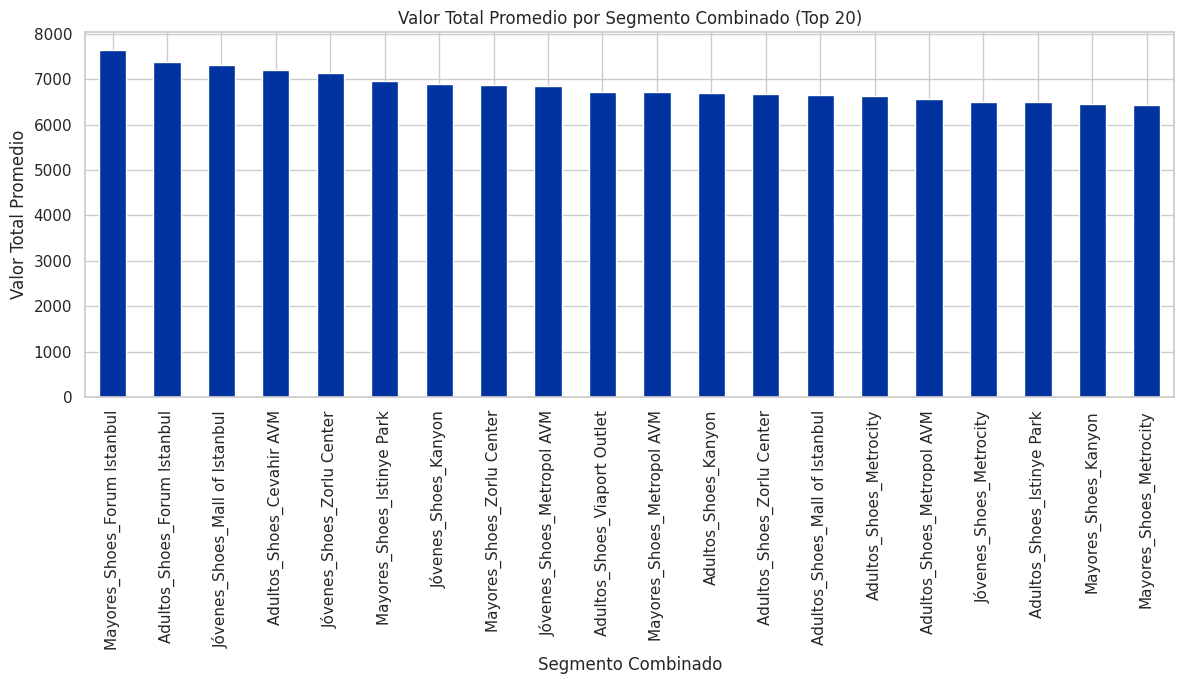

In [24]:
segment_value = df.groupby('combined_segment')['total_value'].mean().sort_values(ascending=False)

print("Valor total promedio por segmento combinado (primeros 20 segmentos con mayor valor):")
display(segment_value.head(20))

plt.figure(figsize=(12, 7))
segment_value.head(20).plot(kind='bar', color=corporate_colors[0])
plt.title('Valor Total Promedio por Segmento Combinado (Top 20)')
plt.xlabel('Segmento Combinado')
plt.ylabel('Valor Total Promedio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

**¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?**

Los segmentos que destacan por tener un alto valor promedio son aquellos combinaciones de Grupo de Edad, Categoría de Producto,+ Centro Comercial. Por ejemplo, `Mayores_Shoes_Forum Istanbul`, `Adultos_Shoes_Forum Istanbul`, y `Jóvenes_Shoes_Mall of Istanbul` muestran un alto valor promedio. Estos segmentos, especialmente aquellos que compran zapatos en centros comerciales específicos, representan un alto potencial de valor.

**¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?**
Ofrecer programas de fidelización, descuentos por compras recurrentes, o promociones en días específicos, también se podrían
sugerir productos complementarios, ofrecer paquetes o bundles, o implementar precios escalonados o utilizar canales de marketing más económicos y enfocarse en mensajes que resalten el valor y las ofertas.

**¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?**

*   **Categoría de Producto:** La categoría "Shoes" (Zapatos) parece estar asociada con un valor promedio de compra más alto en comparación con otras categorías, incluso después de la reducción. Esto sugiere que los clientes están dispuestos a gastar más en esta categoría. Las categorías agrupadas como "Otros" y "Food & Beverage" tienden a tener valores promedio más bajos.
*   **Centro Comercial:** Ciertos centros comerciales, como "Forum Istanbul", "Mall of Istanbul", "Zorlu Center", "Cevahir AVM", "Metropol AVM", "Kanyon", y "Istinye Park", parecen estar asociados con segmentos de alto valor, particularmente cuando se combinan con categorías de alto valor como "Shoes". Esto podría deberse a la afluencia de clientes con mayor poder adquisitivo en esas ubicaciones o a la oferta específica de productos en esos centros. Por otro lado, centros comerciales como "Viaport Outlet" y "Emaar Square Mall" aparecen en segmentos de menor valor promedio, lo que podría indicar un enfoque en descuentos o un perfil de cliente diferente.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!